# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



## 1. Hypothesis Generation


#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history, and records are good.
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
5. Applicants ages
6. Profession and industries




## 2. Data Exploration


In [208]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
import pickle


In [ ]:
df = pd.read_csv("data.csv") 
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [11]:
df.value_counts(['Dependents'])

Dependents
0             345
1             102
2             101
3+             51
dtype: int64

In [12]:
df.value_counts(['Married','Dependents'])

Married  Dependents
Yes      0             174
No       0             171
Yes      2              93
         1              79
         3+             44
No       1              23
         2               8
         3+              7
dtype: int64

In [13]:
df.value_counts(['Loan_Amount_Term'])
            

Loan_Amount_Term
360.0               512
180.0                44
480.0                15
300.0                13
84.0                  4
240.0                 4
120.0                 3
36.0                  2
60.0                  2
12.0                  1
dtype: int64

In [14]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



(array([ 17., 224., 182.,  81.,  29.,  25.,  15.,   7.,   5.,   7.,   6.,
          3.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <BarContainer object of 50 artists>)

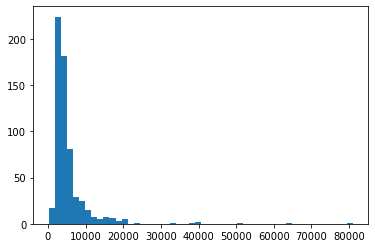

In [27]:
plt.hist(df['ApplicantIncome'],bins=50)


Look at box plots to understand the distributions. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0115614c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f011561d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f011558ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f01155e5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f01155eac0>],
 'means': []}

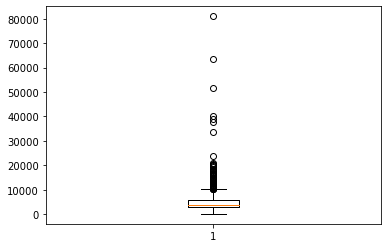

In [17]:
plt.boxplot(df['ApplicantIncome'])

Look at the distribution of income segregated  by `Education`

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='[Education]'>

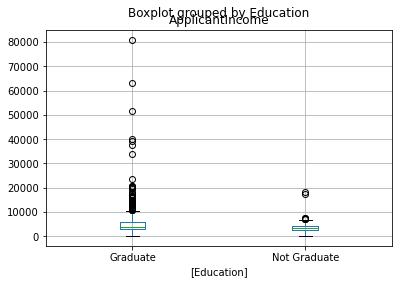

In [21]:
df.boxplot(column=['ApplicantIncome'], by=['Education'])

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:>

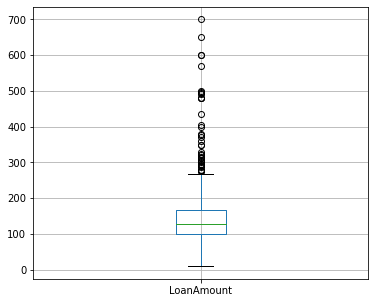

In [23]:
plt.figure(figsize=(6,5))
df.boxplot(column=['LoanAmount'])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [25]:
df.pivot_table(values='ApplicantIncome', index=['Education'], columns=['Self_Employed'])

Self_Employed,No,Yes
Education,,
Graduate,5504.203085,7735.507692
Not Graduate,3457.108108,6024.647059


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
X['Credit_History'].value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [69]:
replace_values = {'Gender':{'Male':0,'Female':1}, 
                  'Married':{'Yes':1,'No':0},
                'Dependents':{'0':0,'1':1,'2':2,'3+':3},
                  'Education':{'Graduate':1,'Not Graduate':0},
                  'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                  'Self_Employed':{'Yes':1,'No':0}}
        

In [203]:
#X = df.replace(replace_values)
X = df[['Gender','Married','Dependents','Education','Property_Area','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y = df['Loan_Status'].replace({'Y':1,'N':0})

In [204]:
X.head()

,Gender,Married,Dependents,Education,Property_Area,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,Urban,No,5849,0.0,NaN,360.0,1.0
1,Male,Yes,1,Graduate,Rural,No,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Urban,Yes,3000,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,Urban,No,2583,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,Urban,No,6000,0.0,141.0,360.0,1.0


### Impute strategies
1. Gender, Married, Dependents, Education, Property_Area, Self_Employed -- most requence
2. Credit_History -- build unknow class
3. ApplicanIncome, CoapplicatntIncome --- fillna with median 
4. LoanAmount --- Fillna or 0 with median
5. Loan_Amount_Term --fillna or 0 with mode


In [86]:
X['Credit_History'] = X['Credit_History'].fillna(value=2)

In [ ]:
X[['Gender','Married','Dependents','Education','Property_Area','Self_Employed']].fillna(

In [87]:
X.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Property_Area         0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

### Feature Engineering 
1. LoanAmount, ApppicantIncome --- Logtransform

In [30]:
fun_trans = FunctionTransformer(np.log1p)

Combine both incomes as total income and take a log transformation of the same.

In [31]:
X = fun_trans.fit_transform(df[['LoanAmount','ApplicantIncome']])

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  3.,  0.,  3.,  4., 14., 21., 32., 57., 53., 67., 67.,
        50., 49., 35., 43., 16., 20., 16., 14.,  8.,  5.,  8.,  8.,  6.,
         2.,  1.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([ 5.01727984,  5.14297858,  5.26867731,  5.39437605,  5.52007479,
         5.64577353,  5.77147227,  5.89717101,  6.02286975,  6.14856849,
         6.27426723,  6.39996596,  6.5256647 ,  6.65136344,  6.77706218,
         6.90276092,  7.02845966,  7.1541584 ,  7.27985714,  7.40555587,
         7.53125461,  7.65695335,  7.78265209,  7.90835083,  8.03404957,
         8.15974831,  8.28544705,  8.41114579,  8.53684452,  8.66254326,
         8.788242  ,  8.91394074,  9.03963948,  9.16533822,  9.29103696,
         9.4167357 ,  9.54243444,  9.66813317,  9.79383191,  9.91953065,
        10.04522939, 10.17092813, 10.29662687, 10.42232561, 10.54802435,
        10.67372309, 10.79942182, 10.92512056, 11.0508193 ,

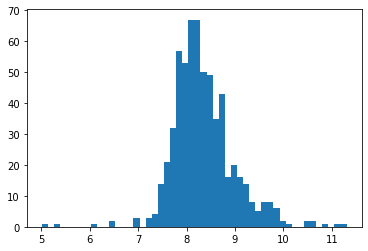

In [35]:
plt.hist(X['ApplicantIncome'],bins=50)

## 4. Building a Predictive Model

In [144]:
pipeline = Pipeline(steps=[('classifier', LogisticRegression())])

# Find the best hyperparameters and model using GridSearchCV on the train set
param_grid = {'classifier': [RandomForestClassifier(),
                             SVC(),
                             LogisticRegression(),
                             RandomForestClassifier(),
                            AdaBoostClassifier(),
                            GaussianNB(),
                            XGBClassifier()]}    # Which is better?

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

In [145]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier(),
                                        AdaBoostClassifier(), GaussianNB(),
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None)]})

In [127]:
grid.best_score_

0.8195652173913043

In [160]:
y_pred = grid.predict(X_test)

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62        55
           1       0.77      0.99      0.86        99

    accuracy                           0.80       154
   macro avg       0.86      0.72      0.74       154
weighted avg       0.84      0.80      0.78       154



In [149]:
params = [{'kernel':['linear']},{'kernel':['rbf'],'C':[0.0001,0.005,1,10],'gamma':[0.0001,0.001]}]
grid_svc = GridSearchCV(estimator=SVC(), param_grid=params, cv=5, n_jobs=-1)

In [150]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'kernel': ['linear']},
                         {'C': [0.0001, 0.005, 1, 10], 'gamma': [0.0001, 0.001],
                          'kernel': ['rbf']}])

In [153]:
grid_svc.best_score_

0.8195652173913043

In [156]:
y_pred = grid_svc.predict(X_test)

In [157]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        55
           1       0.74      1.00      0.85        99

    accuracy                           0.78       154
   macro avg       0.87      0.69      0.70       154
weighted avg       0.84      0.78      0.75       154



In [197]:
params = { }
grid_ran = GridSearchCV(estimator=SVC(),param_grid=params,  cv=5, n_jobs=-1)
grid_ran.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1, param_grid={})

In [170]:
grid_r = RandomForestClassifier()
grid_r.fit(X_train,y_train)

RandomForestClassifier()

In [198]:
y_pred = grid_ran.predict(X_test)

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55        55
           1       0.74      0.97      0.84        99

    accuracy                           0.77       154
   macro avg       0.81      0.68      0.70       154
weighted avg       0.79      0.77      0.74       154



In [193]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.38      0.53        55
           1       0.74      0.97      0.84        99

    accuracy                           0.76       154
   macro avg       0.81      0.68      0.69       154
weighted avg       0.79      0.76      0.73       154



In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        55
           1       0.74      1.00      0.85        99

    accuracy                           0.78       154
   macro avg       0.87      0.69      0.70       154
weighted avg       0.84      0.78      0.75       154



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [104]:
##preprocessing 对字段分别做相关的处理
numeric_0_transform = Pipeline([('impute_median_0', SimpleImputer(strategy='median')), 
                              ('impute_median2_0', SimpleImputer(missing_values=0,strategy='median')),
                              ('log_transform_0', FunctionTransformer(np.log1p)),
                              ('scaling_0', StandardScaler())])

numeric_transform = Pipeline([('impute_median', SimpleImputer(strategy='median')), 
                              ('log_transform', FunctionTransformer(np.log1p)),
                              ('scaling', StandardScaler())])

categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

categorical_transform_credit_his = Pipeline([('impute_value', SimpleImputer(fill_value=2)), 
                                  ('one-hot-encode_c', OneHotEncoder(sparse=False))])

preprocessing_loan = ColumnTransformer([('numeric', numeric_transform, ['ApplicantIncome','CoapplicantIncome']), 
                                        ('numeric_0', numeric_0_transform, ['LoanAmount','Loan_Amount_Term']), 
                                        ('categorical', categorical_transform, ['Gender','Married','Dependents','Education','Property_Area','Self_Employed']),
                                        ('categorical_cre_his',categorical_transform_credit_his,['Credit_History'])])

In [201]:
pipeline = Pipeline(steps=[('data_prepare',preprocessing_loan),
                           ('classifier',SVC())])

In [202]:
from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('data_prepare',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome']),
                                                 ('numeric_0',
                                                  Pipeline(steps=[('impute_median_0',
                                                                   SimpleImputer(strategy='media...
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Property_Area',
                                                   'Self_Employed']),
                                                 ('categorical_cre_his',
                                                  Pipeline(steps=[('impute_value',
                                                                   SimpleImputer(fill_value=2)),
                                                                  ('one-hot-encode_c',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Credit_History'])])),
                ('classifier', SVC())])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [206]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('data_prepare',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome']),
                                                 ('numeric_0',
                                                  Pipeline(steps=[('impute_median_0',
                                                                   SimpleImputer(strategy='media...
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Property_Area',
                                                   'Self_Employed']),
                                                 ('categorical_cre_his',
                                                  Pipeline(steps=[('impute_value',
                                                                   SimpleImputer(fill_value=2)),
                                                                  ('one-hot-encode_c',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Credit_History'])])),
                ('classifier', SVC())])

In [207]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        48
           1       0.77      1.00      0.87       106

    accuracy                           0.80       154
   macro avg       0.89      0.68      0.70       154
weighted avg       0.84      0.80      0.76       154



In [209]:
pickle.dump( pipeline, open( "loan_model.sav", "wb" ) )

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [211]:
load_m = pickle.load(open('loan_model.sav','rb'))

In [213]:
y_pred = load_m.predict(X_test)

In [214]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)